In [3]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd


In [5]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
data.rename(columns={'Annual Income (k$)':'Anual Income','Spending Score (1-100)':'Spending Score'},inplace=True)

In [11]:
data.head()

,CustomerID,Gender,Age,Anual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df=data.drop(columns=['CustomerID','Gender'])
df.head()

,Age,Anual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


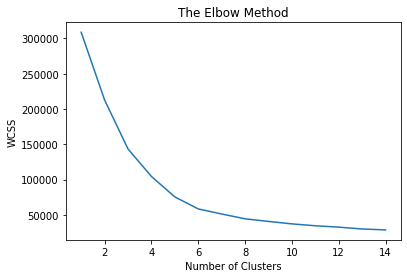

In [15]:
wcss=[]
for i in range (1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [16]:
df.describe()

,Age,Anual Income,Spending Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


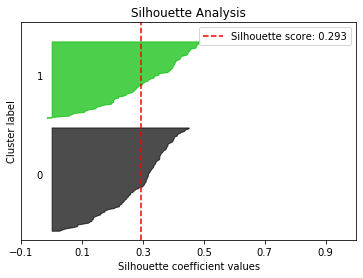

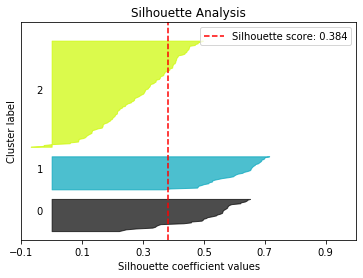

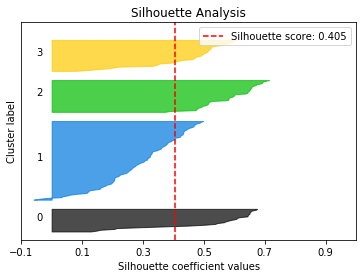

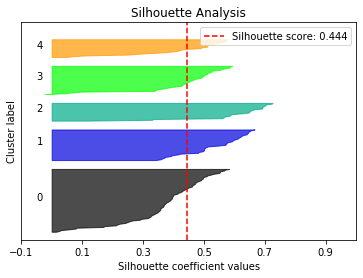

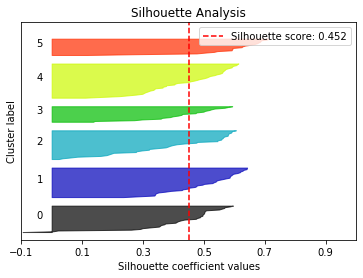

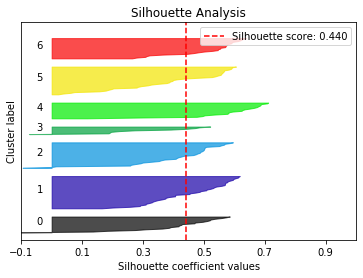

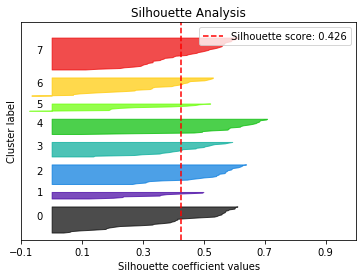

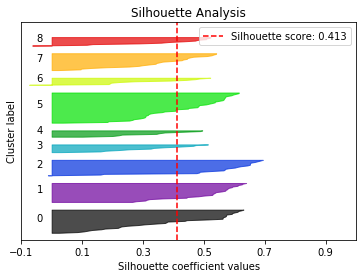

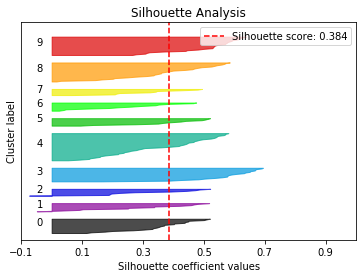

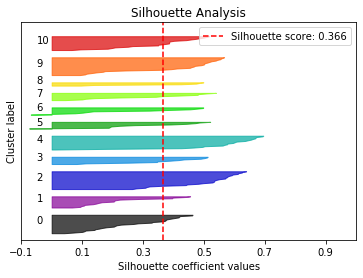

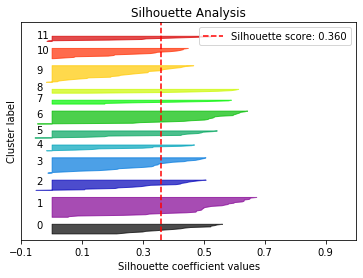

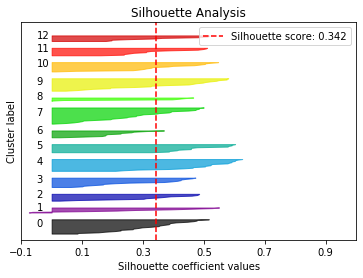

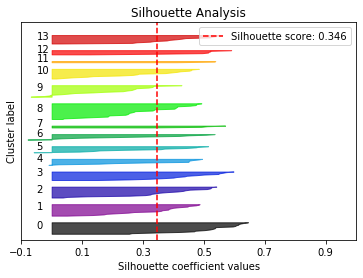

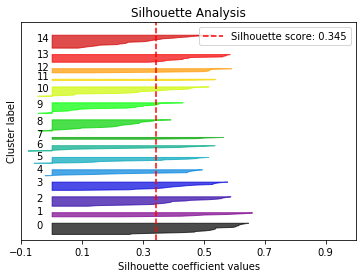

In [30]:
number_clusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]

import scikitplot as skplt
for i in number_clusters:
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=1)
    cluster_labels = kmeans.fit_predict(df)
    skplt.metrics.plot_silhouette(df, cluster_labels)
plt.show()

In [31]:
kmeans = KMeans(n_clusters=4,init='k-means++', random_state=1)
kmeans.fit(df)
df['cluster']=kmeans.labels_

In [32]:
df.head()

,Age,Anual Income,Spending Score,cluster
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,0
4,31,17,40,1


In [35]:
df['cluster'].unique()

array([0, 1, 2, 3])

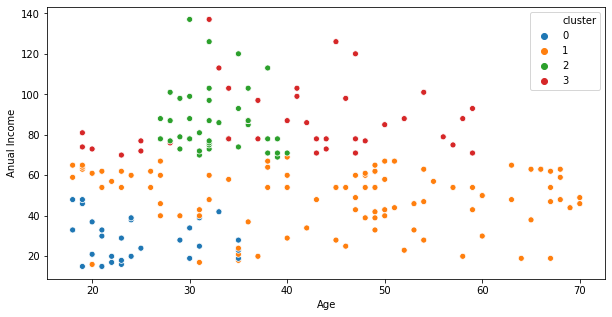

In [47]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Age'],y=df['Anual Income'],hue=df['cluster'],palette="tab10")
plt.show()